In [1]:
import pandas as pd
df = pd.read_csv("zipcode.csv")
df.head(5)

,MODZCTA,label,ZCTA,pop_est,the_geom
0,10001,"10001, 10118","10001, 10119, 10199",23072,MULTIPOLYGON (((-73.98774438827894 40.74406551...
1,10002,10002,10002,74993,MULTIPOLYGON (((-73.99750380833868 40.71407144...
2,10003,10003,10003,54682,MULTIPOLYGON (((-73.98863576728334 40.72293099...
3,10026,10026,10026,39363,MULTIPOLYGON (((-73.96200720826798 40.80550908...
4,10004,10004,10004,3028,MULTIPOLYGON (((-74.00826694529984 40.70771979...


## 2019 Heatmap

In [38]:
import pandas as pd
df = pd.read_csv("201906_final0426.csv")
df

,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,birth_year,gender,zipcode
0,2019-06-03 00:24:44.385,2019-06-03 00:43:13.1930,3437,Riverside Dr & W 91 St,40.793135,-73.977004,2006,Central Park S & 6 Ave,40.765909,-73.976342,1994,1,10024
1,2019-06-03 00:45:46.815,2019-06-03 00:57:03.8290,3171,Amsterdam Ave & W 82 St,40.785247,-73.976673,3367,5 Ave & E 103 St,40.792255,-73.952499,1981,1,10024
2,2019-06-03 01:13:16.798,2019-06-03 01:17:40.3000,3400,E 110 St & Madison Ave,40.796154,-73.947821,3374,Central Park North & Adam Clayton Powell Blvd,40.799484,-73.955613,1970,1,10029
3,2019-06-03 01:19:57.576,2019-06-03 01:28:11.1890,3492,E 118 St & Park Ave,40.800539,-73.941995,3367,5 Ave & E 103 St,40.792255,-73.952499,1999,1,10035
4,2019-06-03 01:23:28.074,2019-06-03 01:27:30.0530,3286,E 89 St & 3 Ave,40.780628,-73.952167,3282,5 Ave & E 88 St,40.783070,-73.959390,1970,1,10128
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10256,2019-06-07 23:52:14.699,2019-06-07 23:58:56.1120,3155,Lexington Ave & E 63 St,40.764400,-73.966490,2006,Central Park S & 6 Ave,40.765909,-73.976342,1966,1,10065
10257,2019-06-07 23:57:52.846,2019-06-08 00:16:34.8520,3314,W 95 St & Broadway,40.793770,-73.971888,3374,Central Park North & Adam Clayton Powell Blvd,40.799484,-73.955613,1999,2,10025
10258,2019-06-07 23:58:17.501,2019-06-08 00:16:09.4800,3314,W 95 St & Broadway,40.793770,-73.971888,3374,Central Park North & Adam Clayton Powell Blvd,40.799484,-73.955613,1999,1,10025
10259,2019-06-07 23:59:27.211,2019-06-08 00:13:28.2350,495,W 47 St & 10 Ave,40.762699,-73.993012,3163,Central Park West & W 68 St,40.773407,-73.977825,1968,2,10036


In [39]:
zip_df = df.groupby('zipcode').size().reset_index(name='count')
zip_df = zip_df.drop(zip_df.index[-1])
zip_df

,zipcode,count
0,10001,272
1,10002,27
2,10003,71
3,10004,6
4,10005,2
5,10007,10
6,10009,43
7,10010,78
8,10011,140
9,10012,33


In [40]:
import geopandas as gpd
from shapely.geometry import Polygon

# 曼哈顿岛的经纬度范围
manhattan_polygon_points = [
    (-73.934580, 40.880912),
    (-73.951977, 40.851736),
    (-74.013391, 40.754845),
    (-74.024283, 40.698188),
    (-74.009793, 40.696703),
    (-73.996477, 40.705462),
    (-73.973175, 40.708431),
    (-73.965734, 40.730099),
    (-73.965358, 40.743476),
    (-73.939437, 40.775202),
    (-73.924349, 40.798349),
    (-73.933169, 40.809234),
    (-73.933984, 40.833898),
    (-73.907016, 40.874670)
]

# 创建曼哈顿岛的Polygon对象
manhattan_polygon = Polygon(manhattan_polygon_points)

# 读取zipcode.csv文件，并将 'the_geom' 列解析为 GeoSeries 对象
df = gpd.read_file('zipcode.csv')

# 将 'the_geom' 列转换为 GeoSeries 对象
df['the_geom'] = gpd.GeoSeries.from_wkt(df['the_geom'])

# 使用.intersects方法筛选符合条件的数据
result = df[df['the_geom'].intersects(manhattan_polygon)]

# 保存结果为新的CSV文件
result.to_csv('manhattan_zipcodes.csv', index=False)

result

,MODZCTA,label,ZCTA,pop_est,the_geom,geometry
0,10001,"10001, 10118","10001, 10119, 10199",23072,"MULTIPOLYGON (((-73.98774 40.74407, -73.98819 ...",None
1,10002,10002,10002,74993,"MULTIPOLYGON (((-73.99750 40.71407, -73.99709 ...",None
2,10003,10003,10003,54682,"MULTIPOLYGON (((-73.98864 40.72293, -73.98876 ...",None
3,10026,10026,10026,39363,"MULTIPOLYGON (((-73.96201 40.80551, -73.96007 ...",None
4,10004,10004,10004,3028,"MULTIPOLYGON (((-74.00827 40.70772, -74.00937 ...",None
5,10005,10005,"10005, 10271",8831,"MULTIPOLYGON (((-74.00783 40.70309, -74.00786 ...",None
6,10006,10006,10006,3454,"MULTIPOLYGON (((-74.01251 40.70677, -74.01325 ...",None
7,10007,10007,"10007, 10278, 10279",7023,"MULTIPOLYGON (((-74.00998 40.70981, -74.01123 ...",None
8,10009,10009,10009,57925,"MULTIPOLYGON (((-73.98864 40.72293, -73.98859 ...",None
9,10010,10010,10010,33730,"MULTIPOLYGON (((-73.97979 40.73496, -73.97988 ...",None


In [41]:
result.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 49 entries, 0 to 177
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   MODZCTA   49 non-null     object  
 1   label     49 non-null     object  
 2   ZCTA      49 non-null     object  
 3   pop_est   49 non-null     object  
 4   the_geom  49 non-null     geometry
 5   geometry  0 non-null      geometry
dtypes: geometry(2), object(4)
memory usage: 2.7+ KB


In [42]:
result['MODZCTA'] = result['MODZCTA'].astype(int)

/Users/xuyanzhao/anaconda3/lib/python3.11/site-packages/geopandas/geodataframe.py:1525: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [43]:
result.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 49 entries, 0 to 177
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   MODZCTA   49 non-null     int64   
 1   label     49 non-null     object  
 2   ZCTA      49 non-null     object  
 3   pop_est   49 non-null     object  
 4   the_geom  49 non-null     geometry
 5   geometry  0 non-null      geometry
dtypes: geometry(2), int64(1), object(3)
memory usage: 2.7+ KB


In [44]:
zip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   zipcode  35 non-null     int64
 1   count    35 non-null     int64
dtypes: int64(2)
memory usage: 692.0 bytes


In [45]:
# convert int to string
zip_df["zipcode"] = zip_df["zipcode"].astype(int)

In [46]:
zip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   zipcode  35 non-null     int64
 1   count    35 non-null     int64
dtypes: int64(2)
memory usage: 692.0 bytes


In [47]:
import pandas as pd

# 加载原始数据 zip_df
# 假设 zip_df 是一个 Pandas DataFrame，包含 'zipcode' 和 'count' 列
# 例如：zip_df = pd.DataFrame({'zipcode': [10001, 10002, 10003], 'count': [5, 8, 12]})

# 加载 'manhattan_zipcodes.csv'
manhattan_zipcodes = pd.read_csv('manhattan_zipcodes.csv')

# 将两个 DataFrame 合并
merged_df = manhattan_zipcodes.merge(zip_df, how='left', left_on='MODZCTA', right_on='zipcode')

# 处理缺失的数据并在 count 部分补上 0
merged_df['zipcode'] = merged_df['zipcode'].fillna(merged_df['MODZCTA'])
merged_df['count'] = merged_df['count'].fillna(0)

# 最终的结果保存在 merged_df 中
# 如果需要，你可以选择保留特定的列，例如：result_df = merged_df[['zipcode', 'count']]

# 打印结果
newzipcode_df = merged_df[['zipcode', 'count']]
newzipcode_df

,zipcode,count
0,10001.0,272.0
1,10002.0,27.0
2,10003.0,71.0
3,10026.0,285.0
4,10004.0,6.0
5,10005.0,2.0
6,10006.0,0.0
7,10007.0,10.0
8,10009.0,43.0
9,10010.0,78.0


In [48]:
newzipcode_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   zipcode  49 non-null     float64
 1   count    49 non-null     float64
dtypes: float64(2)
memory usage: 916.0 bytes


In [49]:
newzipcode_df["zipcode"] = newzipcode_df["zipcode"].astype(int)
newzipcode_df["count"] = newzipcode_df["count"].astype(int)
newzipcode_df.to_csv('2019_citybikegroupby0426.csv', index=False)
newzipcode_df

/var/folders/ms/cfxcc_js0jjbl28zw3cvs7lc0000gn/T/ipykernel_15494/2754712553.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newzipcode_df["zipcode"] = newzipcode_df["zipcode"].astype(int)
/var/folders/ms/cfxcc_js0jjbl28zw3cvs7lc0000gn/T/ipykernel_15494/2754712553.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newzipcode_df["count"] = newzipcode_df["count"].astype(int)


,zipcode,count
0,10001,272
1,10002,27
2,10003,71
3,10026,285
4,10004,6
5,10005,2
6,10006,0
7,10007,10
8,10009,43
9,10010,78


In [50]:
import geopandas as gpd
from shapely.geometry import Polygon
gdf_2 = gpd.read_file("manhattan_areas.geojson")

In [51]:
gdf_2.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   OBJECTID        106 non-null    int64   
 1   postalCode      106 non-null    object  
 2   PO_NAME         106 non-null    object  
 3   STATE           106 non-null    object  
 4   borough         106 non-null    object  
 5   ST_FIPS         106 non-null    object  
 6   CTY_FIPS        106 non-null    object  
 7   BLDGpostalCode  106 non-null    int64   
 8   Shape_Leng      106 non-null    float64 
 9   Shape_Area      106 non-null    float64 
 10  @id             106 non-null    object  
 11  geometry        106 non-null    geometry
dtypes: float64(2), geometry(1), int64(2), object(7)
memory usage: 10.1+ KB


In [52]:
newzipcode_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   zipcode  49 non-null     int64
 1   count    49 non-null     int64
dtypes: int64(2)
memory usage: 916.0 bytes


In [53]:
# convert int to string
newzipcode_df["zipcode"] = newzipcode_df["zipcode"].astype(str)

/var/folders/ms/cfxcc_js0jjbl28zw3cvs7lc0000gn/T/ipykernel_15494/2331226406.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newzipcode_df["zipcode"] = newzipcode_df["zipcode"].astype(str)


In [54]:
df_merge = gdf_2.merge( newzipcode_df, left_on="postalCode", right_on="zipcode", how="right")
df_merge

,OBJECTID,postalCode,PO_NAME,STATE,borough,ST_FIPS,CTY_FIPS,BLDGpostalCode,Shape_Leng,Shape_Area,@id,geometry,zipcode,count
0,114.0,10001,New York,NY,Manhattan,36,061,0.0,19254.442129,1.779494e+07,http://nyc.pediacities.com/Resource/PostalCode...,"POLYGON ((-74.00827 40.75259, -74.00763 40.754...",10001,272
1,124.0,10002,New York,NY,Manhattan,36,061,0.0,36484.417965,2.628013e+07,http://nyc.pediacities.com/Resource/PostalCode...,"POLYGON ((-73.97442 40.73642, -73.97450 40.735...",10002,27
2,122.0,10003,New York,NY,Manhattan,36,061,0.0,17396.136890,1.553838e+07,http://nyc.pediacities.com/Resource/PostalCode...,"POLYGON ((-73.97986 40.73497, -73.98864 40.722...",10003,71
3,77.0,10026,New York,NY,Manhattan,36,061,0.0,15644.925148,1.109268e+07,http://nyc.pediacities.com/Resource/PostalCode...,"POLYGON ((-73.94460 40.80323, -73.94922 40.796...",10026,285
4,139.0,10004,New York,NY,Manhattan,36,061,0.0,13769.878563,4.001782e+06,http://nyc.pediacities.com/Resource/PostalCode...,"POLYGON ((-74.00597 40.70432, -74.00580 40.704...",10004,6
5,137.0,10005,New York,NY,Manhattan,36,061,0.0,6384.012272,2.082901e+06,http://nyc.pediacities.com/Resource/PostalCode...,"POLYGON ((-74.00597 40.70432, -74.00777 40.703...",10005,2
6,135.0,10006,New York,NY,Manhattan,36,061,0.0,6794.872357,1.716641e+06,http://nyc.pediacities.com/Resource/PostalCode...,"POLYGON ((-74.01123 40.71037, -74.00999 40.709...",10006,0
7,130.0,10007,New York,NY,Manhattan,36,061,0.0,13425.241772,5.328635e+06,http://nyc.pediacities.com/Resource/PostalCode...,"POLYGON ((-74.01362 40.71631, -74.01339 40.717...",10007,10
8,126.0,10009,New York,NY,Manhattan,36,061,0.0,16247.124264,1.590352e+07,http://nyc.pediacities.com/Resource/PostalCode...,"POLYGON ((-73.97346 40.73071, -73.97249 40.729...",10009,43
9,119.0,10010,New York,NY,Manhattan,36,061,0.0,23512.593498,9.768395e+06,http://nyc.pediacities.com/Resource/PostalCode...,"POLYGON ((-73.98775 40.74407, -73.98453 40.742...",10010,78


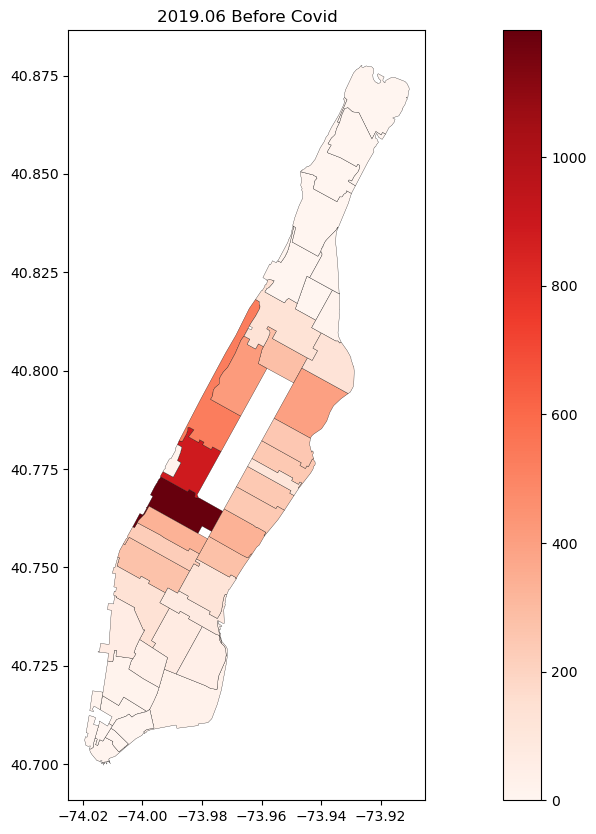

In [55]:
import matplotlib.pyplot as plt
df_merge.plot(column="count", legend=True, figsize = (20,10),
             cmap="Reds", edgecolor = "k",
             linewidth = 0.2)
plt.title('2019.06 Before Covid')
plt.show()

## 2020 Heatmap

In [56]:
import pandas as pd
df = pd.read_csv("202006_final0426.csv")
df

,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,birth_year,gender,zipcode
0,2020-06-01 00:10:29.545,2020-06-01 00:25:21.0260,3163,Central Park West & W 68 St,40.773407,-73.977825,3295,Central Park W & W 96 St,40.791270,-73.964839,1991,2,99999
1,2020-06-01 00:28:21.776,2020-06-01 00:50:33.9960,3156,E 72 St & York Ave,40.766638,-73.953483,2006,Central Park S & 6 Ave,40.765909,-73.976342,1976,1,10021
2,2020-06-01 00:31:39.110,2020-06-01 00:41:56.4540,3814,E 56 St & Madison Ave,40.761573,-73.972628,3137,5 Ave & E 73 St,40.772828,-73.966853,1996,0,10022
3,2020-06-01 00:34:06.838,2020-06-01 00:43:05.9120,3520,Adam Clayton Powell Blvd & W 118 St,40.804372,-73.951475,3367,5 Ave & E 103 St,40.792255,-73.952499,1999,1,10026
4,2020-06-01 00:34:46.081,2020-06-01 00:45:07.8010,2006,Central Park S & 6 Ave,40.765909,-73.976342,3163,Central Park West & W 68 St,40.773407,-73.977825,1974,1,99999
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6524,2020-06-05 17:59:07.947,2020-06-05 19:39:40.3360,3255,8 Ave & W 31 St,40.750585,-73.994685,3136,5 Ave & E 63 St,40.766368,-73.971518,1969,0,10001
6525,2020-06-05 17:59:11.223,2020-06-05 18:02:19.4440,3158,W 63 St & Broadway,40.771639,-73.982614,3163,Central Park West & W 68 St,40.773407,-73.977825,1958,1,10023
6526,2020-06-05 17:59:25.499,2020-06-05 18:04:42.8480,3167,Amsterdam Ave & W 73 St,40.779668,-73.980930,3163,Central Park West & W 68 St,40.773407,-73.977825,1970,1,10023
6527,2020-06-05 18:00:13.281,2020-06-05 18:29:25.5190,3177,W 84 St & Broadway,40.786795,-73.977112,3295,Central Park W & W 96 St,40.791270,-73.964839,1954,2,10024


In [57]:
zip_df = df.groupby('zipcode').size().reset_index(name='count')
zip_df = zip_df.drop(zip_df.index[-1])
zip_df

,zipcode,count
0,10001,146
1,10002,18
2,10003,121
3,10004,2
4,10005,4
5,10007,11
6,10009,23
7,10010,74
8,10011,133
9,10012,37


In [58]:
result = pd.read_csv("manhattan_zipcodes.csv")
result

,MODZCTA,label,ZCTA,pop_est,the_geom,geometry
0,10001,"10001, 10118","10001, 10119, 10199",23072,MULTIPOLYGON (((-73.98774438827894 40.74406551...,NaN
1,10002,10002,10002,74993,MULTIPOLYGON (((-73.99750380833868 40.71407144...,NaN
2,10003,10003,10003,54682,MULTIPOLYGON (((-73.98863576728334 40.72293099...,NaN
3,10026,10026,10026,39363,MULTIPOLYGON (((-73.96200720826798 40.80550908...,NaN
4,10004,10004,10004,3028,MULTIPOLYGON (((-74.00826694529984 40.70771979...,NaN
5,10005,10005,"10005, 10271",8831,MULTIPOLYGON (((-74.00782636323468 40.70308666...,NaN
6,10006,10006,10006,3454,MULTIPOLYGON (((-74.01250844578733 40.70676972...,NaN
7,10007,10007,"10007, 10278, 10279",7023,MULTIPOLYGON (((-74.0099841276905 40.709805680...,NaN
8,10009,10009,10009,57925,MULTIPOLYGON (((-73.98863576728334 40.72293099...,NaN
9,10010,10010,10010,33730,MULTIPOLYGON (((-73.9797860547436 40.734962793...,NaN


In [59]:
result['MODZCTA'] = result['MODZCTA'].astype(int)

In [60]:
zip_df["zipcode"] = zip_df["zipcode"].astype(int)

In [61]:
import pandas as pd

# 加载原始数据 zip_df
# 假设 zip_df 是一个 Pandas DataFrame，包含 'zipcode' 和 'count' 列
# 例如：zip_df = pd.DataFrame({'zipcode': [10001, 10002, 10003], 'count': [5, 8, 12]})

# 加载 'manhattan_zipcodes.csv'
manhattan_zipcodes = pd.read_csv('manhattan_zipcodes.csv')

# 将两个 DataFrame 合并
merged_df = manhattan_zipcodes.merge(zip_df, how='left', left_on='MODZCTA', right_on='zipcode')

# 处理缺失的数据并在 count 部分补上 0
merged_df['zipcode'] = merged_df['zipcode'].fillna(merged_df['MODZCTA'])
merged_df['count'] = merged_df['count'].fillna(0)

# 最终的结果保存在 merged_df 中
# 如果需要，你可以选择保留特定的列，例如：result_df = merged_df[['zipcode', 'count']]

# 打印结果
newzipcode_df = merged_df[['zipcode', 'count']]
newzipcode_df

,zipcode,count
0,10001.0,146.0
1,10002.0,18.0
2,10003.0,121.0
3,10026.0,244.0
4,10004.0,2.0
5,10005.0,4.0
6,10006.0,0.0
7,10007.0,11.0
8,10009.0,23.0
9,10010.0,74.0


In [62]:
newzipcode_df["zipcode"] = newzipcode_df["zipcode"].astype(int)
newzipcode_df["count"] = newzipcode_df["count"].astype(int)
newzipcode_df.to_csv('2020_citybikegroupby0426.csv', index=False)
newzipcode_df

/var/folders/ms/cfxcc_js0jjbl28zw3cvs7lc0000gn/T/ipykernel_15494/2373477699.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newzipcode_df["zipcode"] = newzipcode_df["zipcode"].astype(int)
/var/folders/ms/cfxcc_js0jjbl28zw3cvs7lc0000gn/T/ipykernel_15494/2373477699.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newzipcode_df["count"] = newzipcode_df["count"].astype(int)


,zipcode,count
0,10001,146
1,10002,18
2,10003,121
3,10026,244
4,10004,2
5,10005,4
6,10006,0
7,10007,11
8,10009,23
9,10010,74


In [63]:
import geopandas as gpd
from shapely.geometry import Polygon
gdf_2 = gpd.read_file("manhattan_areas.geojson")

In [64]:
# convert int to string
newzipcode_df["zipcode"] = newzipcode_df["zipcode"].astype(str)

/var/folders/ms/cfxcc_js0jjbl28zw3cvs7lc0000gn/T/ipykernel_15494/2331226406.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newzipcode_df["zipcode"] = newzipcode_df["zipcode"].astype(str)


In [65]:
df_merge = gdf_2.merge( newzipcode_df, left_on="postalCode", right_on="zipcode", how="right")
df_merge

,OBJECTID,postalCode,PO_NAME,STATE,borough,ST_FIPS,CTY_FIPS,BLDGpostalCode,Shape_Leng,Shape_Area,@id,geometry,zipcode,count
0,114.0,10001,New York,NY,Manhattan,36,061,0.0,19254.442129,1.779494e+07,http://nyc.pediacities.com/Resource/PostalCode...,"POLYGON ((-74.00827 40.75259, -74.00763 40.754...",10001,146
1,124.0,10002,New York,NY,Manhattan,36,061,0.0,36484.417965,2.628013e+07,http://nyc.pediacities.com/Resource/PostalCode...,"POLYGON ((-73.97442 40.73642, -73.97450 40.735...",10002,18
2,122.0,10003,New York,NY,Manhattan,36,061,0.0,17396.136890,1.553838e+07,http://nyc.pediacities.com/Resource/PostalCode...,"POLYGON ((-73.97986 40.73497, -73.98864 40.722...",10003,121
3,77.0,10026,New York,NY,Manhattan,36,061,0.0,15644.925148,1.109268e+07,http://nyc.pediacities.com/Resource/PostalCode...,"POLYGON ((-73.94460 40.80323, -73.94922 40.796...",10026,244
4,139.0,10004,New York,NY,Manhattan,36,061,0.0,13769.878563,4.001782e+06,http://nyc.pediacities.com/Resource/PostalCode...,"POLYGON ((-74.00597 40.70432, -74.00580 40.704...",10004,2
5,137.0,10005,New York,NY,Manhattan,36,061,0.0,6384.012272,2.082901e+06,http://nyc.pediacities.com/Resource/PostalCode...,"POLYGON ((-74.00597 40.70432, -74.00777 40.703...",10005,4
6,135.0,10006,New York,NY,Manhattan,36,061,0.0,6794.872357,1.716641e+06,http://nyc.pediacities.com/Resource/PostalCode...,"POLYGON ((-74.01123 40.71037, -74.00999 40.709...",10006,0
7,130.0,10007,New York,NY,Manhattan,36,061,0.0,13425.241772,5.328635e+06,http://nyc.pediacities.com/Resource/PostalCode...,"POLYGON ((-74.01362 40.71631, -74.01339 40.717...",10007,11
8,126.0,10009,New York,NY,Manhattan,36,061,0.0,16247.124264,1.590352e+07,http://nyc.pediacities.com/Resource/PostalCode...,"POLYGON ((-73.97346 40.73071, -73.97249 40.729...",10009,23
9,119.0,10010,New York,NY,Manhattan,36,061,0.0,23512.593498,9.768395e+06,http://nyc.pediacities.com/Resource/PostalCode...,"POLYGON ((-73.98775 40.74407, -73.98453 40.742...",10010,74


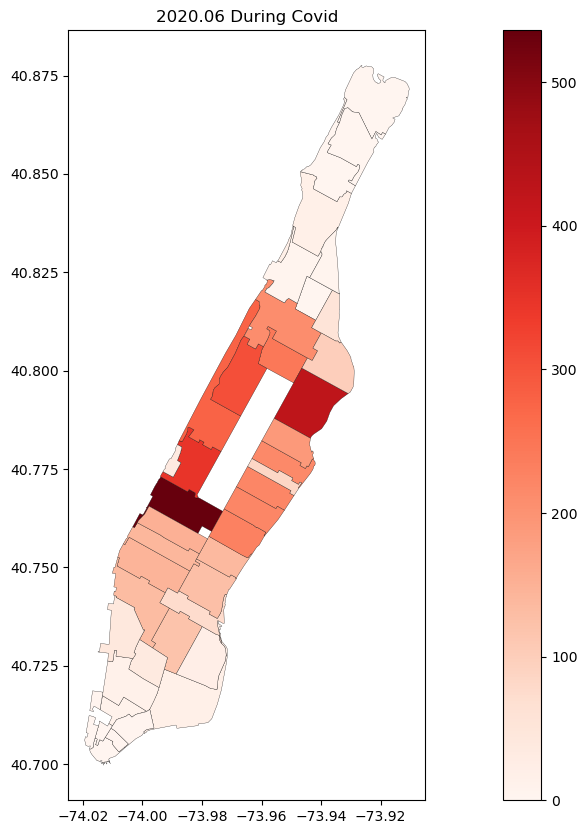

In [66]:
import matplotlib.pyplot as plt
df_merge.plot(column="count", legend=True, figsize = (20,10),
             cmap="Reds", edgecolor = "k",
             linewidth = 0.2)
plt.title('2020.06 During Covid')
plt.show()

## 差值可视化

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取2019和2020的数据
df_2019 = pd.read_csv('2019_citybikegroupby0426.csv')
df_2020 = pd.read_csv('2020_citybikegroupby0426.csv')

# 确保两个数据框的 'zipcode' 列都是索引
df_2019.set_index('zipcode', inplace=True)
df_2020.set_index('zipcode', inplace=True)

# 计算差值
difference = df_2019['count'] - df_2020['count']

result_df = pd.DataFrame({'zipcode': difference.index, 'difference': difference.values})

result_df

,zipcode,difference
0,10001,126
1,10002,9
2,10003,-50
3,10026,41
4,10004,4
5,10005,-2
6,10006,0
7,10007,-1
8,10009,20
9,10010,4


In [68]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   zipcode     49 non-null     int64
 1   difference  49 non-null     int64
dtypes: int64(2)
memory usage: 916.0 bytes


In [69]:
gdf_2.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   OBJECTID        106 non-null    int64   
 1   postalCode      106 non-null    object  
 2   PO_NAME         106 non-null    object  
 3   STATE           106 non-null    object  
 4   borough         106 non-null    object  
 5   ST_FIPS         106 non-null    object  
 6   CTY_FIPS        106 non-null    object  
 7   BLDGpostalCode  106 non-null    int64   
 8   Shape_Leng      106 non-null    float64 
 9   Shape_Area      106 non-null    float64 
 10  @id             106 non-null    object  
 11  geometry        106 non-null    geometry
dtypes: float64(2), geometry(1), int64(2), object(7)
memory usage: 10.1+ KB


In [70]:
result_df["zipcode"] = result_df["zipcode"].astype(str)

In [71]:
df_merge = gdf_2.merge(result_df, left_on="postalCode", right_on="zipcode", how="right")
df_merge

,OBJECTID,postalCode,PO_NAME,STATE,borough,ST_FIPS,CTY_FIPS,BLDGpostalCode,Shape_Leng,Shape_Area,@id,geometry,zipcode,difference
0,114.0,10001,New York,NY,Manhattan,36,061,0.0,19254.442129,1.779494e+07,http://nyc.pediacities.com/Resource/PostalCode...,"POLYGON ((-74.00827 40.75259, -74.00763 40.754...",10001,126
1,124.0,10002,New York,NY,Manhattan,36,061,0.0,36484.417965,2.628013e+07,http://nyc.pediacities.com/Resource/PostalCode...,"POLYGON ((-73.97442 40.73642, -73.97450 40.735...",10002,9
2,122.0,10003,New York,NY,Manhattan,36,061,0.0,17396.136890,1.553838e+07,http://nyc.pediacities.com/Resource/PostalCode...,"POLYGON ((-73.97986 40.73497, -73.98864 40.722...",10003,-50
3,77.0,10026,New York,NY,Manhattan,36,061,0.0,15644.925148,1.109268e+07,http://nyc.pediacities.com/Resource/PostalCode...,"POLYGON ((-73.94460 40.80323, -73.94922 40.796...",10026,41
4,139.0,10004,New York,NY,Manhattan,36,061,0.0,13769.878563,4.001782e+06,http://nyc.pediacities.com/Resource/PostalCode...,"POLYGON ((-74.00597 40.70432, -74.00580 40.704...",10004,4
5,137.0,10005,New York,NY,Manhattan,36,061,0.0,6384.012272,2.082901e+06,http://nyc.pediacities.com/Resource/PostalCode...,"POLYGON ((-74.00597 40.70432, -74.00777 40.703...",10005,-2
6,135.0,10006,New York,NY,Manhattan,36,061,0.0,6794.872357,1.716641e+06,http://nyc.pediacities.com/Resource/PostalCode...,"POLYGON ((-74.01123 40.71037, -74.00999 40.709...",10006,0
7,130.0,10007,New York,NY,Manhattan,36,061,0.0,13425.241772,5.328635e+06,http://nyc.pediacities.com/Resource/PostalCode...,"POLYGON ((-74.01362 40.71631, -74.01339 40.717...",10007,-1
8,126.0,10009,New York,NY,Manhattan,36,061,0.0,16247.124264,1.590352e+07,http://nyc.pediacities.com/Resource/PostalCode...,"POLYGON ((-73.97346 40.73071, -73.97249 40.729...",10009,20
9,119.0,10010,New York,NY,Manhattan,36,061,0.0,23512.593498,9.768395e+06,http://nyc.pediacities.com/Resource/PostalCode...,"POLYGON ((-73.98775 40.74407, -73.98453 40.742...",10010,4


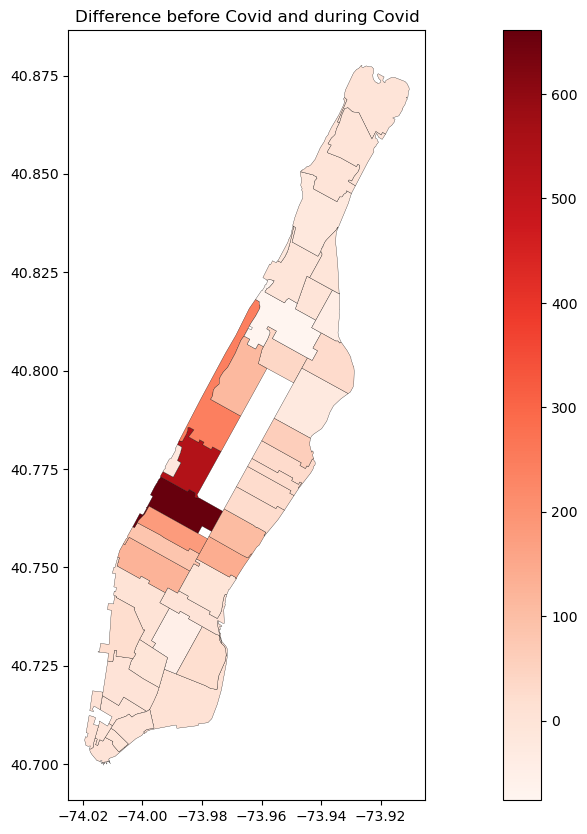

In [72]:
import matplotlib.pyplot as plt
df_merge.plot(column="difference", legend=True, figsize = (20,10),
             cmap="Reds", edgecolor = "k",
             linewidth = 0.2)
plt.title('Difference before Covid and during Covid')
plt.show()

In [73]:
before = pd.read_csv("2019_citybikegroupby0426.csv")
before.rename(columns={'count': '2019_count'}, inplace=True)
before

,zipcode,2019_count
0,10001,272
1,10002,27
2,10003,71
3,10026,285
4,10004,6
5,10005,2
6,10006,0
7,10007,10
8,10009,43
9,10010,78


In [74]:
during = pd.read_csv("2020_citybikegroupby0426.csv")
during.rename(columns={'count': '2020_count'}, inplace=True)
during

,zipcode,2020_count
0,10001,146
1,10002,18
2,10003,121
3,10026,244
4,10004,2
5,10005,4
6,10006,0
7,10007,11
8,10009,23
9,10010,74


In [75]:
new_data = pd.DataFrame({'2019_count': before['2019_count'], '2020_count': during['2020_count']})
new_data

,2019_count,2020_count
0,272,146
1,27,18
2,71,121
3,285,244
4,6,2
5,2,4
6,0,0
7,10,11
8,43,23
9,78,74


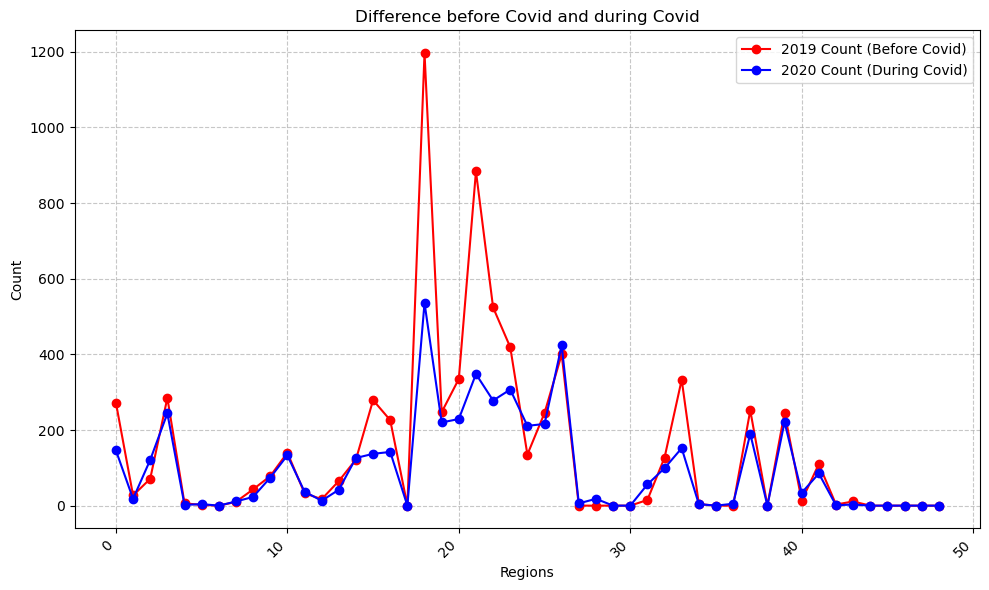

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

# 创建示例数据框
data = {
    '2019_count': [272, 27, 71, 285, 6, 2, 0, 10, 43, 78, 140, 33, 17, 65, 122, 279, 226, 0, 1197, 247, 335, 884, 524, 419, 135, 245, 400, 0, 0, 0, 0, 15, 127, 333, 4, 0, 0, 252, 0, 246, 13, 110, 3, 11, 0, 0, 0, 0, 0],
    '2020_count': [146, 18, 121, 244, 2, 4, 0, 11, 23, 74, 133, 37, 13, 42, 126, 137, 142, 0, 536, 220, 229, 348, 278, 307, 211, 216, 424, 6, 18, 0, 0, 56, 99, 152, 4, 0, 5, 190, 0, 221, 34, 85, 1, 3, 0, 0, 0, 0, 0]
}
new_data = pd.DataFrame(data)

# 读取2019_count和2020_count的全部值
values_2019 = new_data['2019_count'].values
values_2020 = new_data['2020_count'].values

# 设置 x 轴标签
categories = new_data.index

# 可视化数据
plt.figure(figsize=(10, 6))

# 绘制折线图
plt.plot(categories, values_2019, marker='o', linestyle='-', color='r', label='2019 Count (Before Covid)')
plt.plot(categories, values_2020, marker='o', linestyle='-', color='b', label='2020 Count (During Covid)')

# 添加标题和轴标签
plt.title('Difference before Covid and during Covid')
plt.xlabel('Regions')
plt.ylabel('Count')

# 显示图例
plt.legend()

# 添加网格线
plt.grid(True, linestyle='--', alpha=0.7)

# 优化刻度标签
plt.xticks(rotation=45, ha='right')

# 显示图形
plt.tight_layout()
plt.show()